In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 150

In [3]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

# 1. Calculate daily returns for the S&P 100 stocks.

In [7]:
# creates a list of ticket symbols for the S&P 100 so we can pass into yf.download()
wikipedia = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100#Components')
sp100 = list(wikipedia[2].loc[:,'Symbol'])

# the wikipedia has 'BRK.B', but the ticker on Yahoo Finance is 'BRK-B'
sp100.remove('BRK.B') 
sp100.append('BRK-B')

# pull the stock data from yahoo finance
_stocks = yf.download(tickers=sp100, session=session)

# calculate daily returns, use MultiIndex to add a new 'returns' column to the main 'stocks' dataframe
# NOTE - ALL DATA USED WAS FROM JAN 2020 TO AUG 2022 - as per instructions
returns = _stocks.loc['January 2020':'August 2022', "Adj Close"].pct_change()
_stocks[pd.MultiIndex.from_product([['Returns'], _stocks['Adj Close'].columns])] = returns
stocks = _stocks.loc['2020-01':'2022-08']

# the daily returns for each stock can be found by using stocks.loc[:, 'Returns']

[*********************100%***********************]  101 of 101 completed


/tmp/ipykernel_19087/995153143.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _stocks[pd.MultiIndex.from_product([['Returns'], _stocks['Adj Close'].columns])] = returns


# 2. How well do annualized average returns in 2020 predict those in 2021?

In [8]:
# calculate the mean of returns for 2020 and 2021, multiply each by 252 to annualize them 
annreturn2020 = stocks.loc['2020', 'Returns'].mean().mul(252)
annreturn2021 = stocks.loc['2021', 'Returns'].mean().mul(252)

# to see how well 2020 predicts 2021, calculate the correlation
print("The correlation between 2020 and 2021 annualized average returns is", annreturn2020.corr(annreturn2021))

The correlation between 2020 and 2021 annualized average returns is 0.07994827876457122


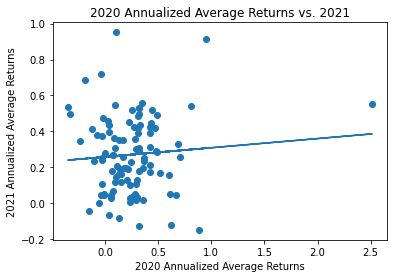

In [9]:
#This plots the annualized average returns in 2021 against those of 2020 to determine the relationship between past and future returns
plt.scatter(annreturn2020, annreturn2021)
plt.xlabel('2020 Annualized Average Returns')
plt.ylabel('2021 Annualized Average Returns')
plt.title('2020 Annualized Average Returns vs. 2021')
m, b = np.polyfit(annreturn2020, annreturn2021, 1)
plt.plot(annreturn2020, m*annreturn2020+b)
plt.show()

**2.) Written Response:**
The plotted points are very far from the line of best fit, visually showing that there is weak correlation. Although the annualized average returns can give a general idea of the performance of stocks, a correlation of 0.0799 is very low and indicates that **annualized average returns in 2020 was NOT a strong predictor of annualized average returns in 2021.** In fact, in statistics, this correlation value would indicate "negligible association. 

The weak correlation between annualized average returns in 2020 and annualized average returns in 2021 can be attributed to the unique and extreme market circumstances in both 2020 and 2021. Most equities in 2020 provided low-to-negative returns due to the onset of the Covid-19 pandemic and subsequent economic shutdowns. In 2021, equities largely bounced back and provided positive returns as the global economy reopened and companies recovered from the effects of the pandemic.


# 3. How well do annualized standard deviations of returns in 2020 predict those in 2021?

In [10]:
# calculate 2020 and 2021 standard deviations of returns, annualize them using np.sqrt(252)
annstddev2020 = stocks.loc['2020', 'Returns'].std().mul(np.sqrt(252))
annstddev2021 = stocks.loc['2021', 'Returns'].std().mul(np.sqrt(252))

# calculate correlation between 2020 and 2021 standard deviations
print("The correlation between annualized standard deviations of returns in 2020 and 2021 is", annstddev2020.corr(annstddev2021))

The correlation between annualized standard deviations of returns in 2020 and 2021 is 0.7166959789505859


A correlation of 0.7167 indicates a moderate association, meaning that **annualized standard deviation (risk) of returns in 2020 was a moderate, but not strong, predictor of 2021 annualized standard deviation (risk) of returns.**

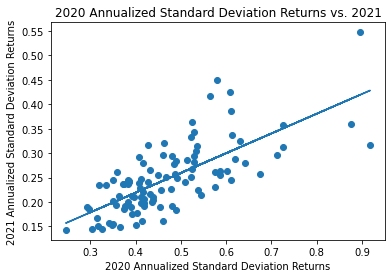

In [11]:
#This plots the annualized average returns in 2021 against those of 2020 to determine whether historical volatility is a reliable predictor of future volatility. 
plt.clf()
plt.scatter(annstddev2020, annstddev2021)
plt.xlabel('2020 Annualized Standard Deviation Returns')
plt.ylabel('2021 Annualized Standard Deviation Returns')
plt.title('2020 Annualized Standard Deviation Returns vs. 2021')
m, b = np.polyfit(annstddev2020, annstddev2021, 1)
plt.plot(annstddev2020, m*annstddev2020+b)
plt.show()

**3.) Written Response:**  Per this graph, we can see that there is a moderate positive correlation between annualized standard deviations of returns in 2020 and 2021. This moderate positive correlation means that the stocks are moving in tandem. The stronger the positive correlation, the more likely the stocks are going to move in the same direction. During 2020, we can see that the annualized standard deviation returns congregate mostly around 0.4 while in 2021, they are mostly congregated between 0.15 and 0.20. This is most likely because 2020 was a very volatile year in the market with larger price swings due to Covid. Nonetheless, from this, we can see that in 2020, the market was essentially twice as volatile as 2021 because the annualized standard deviation of returns were double that of 2021. Although, this graph shows us a pattern between 2020 annualized standard deviation returns and 2021 annualized standard deviation returns, we cannot necessarily predict the future of these stocks, we can only summarize the correlation between the volatility of them.   

# 4. What are the mean, median, minimum, and maximum pairwise correlations between two stocks? Discuss and explain any outliers.

In [12]:
correlationmatrix = stocks.loc[:, 'Returns'].corr() # creates correlaton
_corrlist = np.triu(correlationmatrix, k = 1) # changes everything but the upper triangle of the correlation matrixinto a 0, removing the perfect 1 correlations too.
_corrlist[_corrlist == 0] = np.nan # replace all the zeroes with NaNs so we can calculate mean and median. 
print("The mean pairwise correlation is", np.nanmean(_corrlist)) # use np.nanmean() to ignore the NaNs. Same with median. 
print("The median pairwise correlation is", np.nanmedian(_corrlist))
print("The maximum pairwise correlation is", np.nanmax(_corrlist)) #GOOG and GOOGL is an outlier, next highest is JPM and BAC = 0.9376 (makes sense, both are US banks)
print("The minimum pairwise correlation is", np.nanmin(_corrlist)) #VZ and TSLA at 0.0604. Makes sense, VZ had a terrible decline while TSLA grew. 

The mean pairwise correlation is 0.47502151423091576
The median pairwise correlation is 0.4735425820836478
The maximum pairwise correlation is 0.9937393398304617
The minimum pairwise correlation is 0.0604497549514146


In [17]:
print(f'The mean corre. is: {np.nanmean(_corrlist): 0.4f}')

The mean corre. is:  0.4750


In [13]:
# prints minimum pairwise correlation
minpaircorr = stocks.loc[:, 'Returns'].corr().unstack().sort_values(ascending = True)
print(minpaircorr[:3:2])

# prints top 2 (because of outlier) maximum pairwise correelation
maxpaircorr = stocks.loc[:, 'Returns'].corr().unstack().sort_values(ascending = False)
print(maxpaircorr[101:105:2])

VZ   TSLA   0.0604
TMO  SPG    0.0731
dtype: float64
GOOG  GOOGL   0.9937
BAC   JPM     0.9376
dtype: float64


**4.) Written Response**

**Mean pairwise correlation:** 0.4750

**Median pairwise correlation:** 0.47354

**Verizon (VZ) and Tesla (TSLA) have the lowest pairwise correlation in the index, at 0.06.** This most likely has to do with the fact that these companies operate in different industries, Telecom and Automotive respectively. They do not face the same idiosyncratic drivers of growth that you would expect from an industry peer and therefore their earnings lack any correlation with one another, resulting in little correlation among equity returns.

**The maximum pairwise correlation would be among Google's dual share classes (GOOG and GOOGL) at 0.9937.** This makes sense as the underlying securities represent the same corporation and follow the same changes in stock price. The only difference between the classes lie in their voting rights and this has no statistical significance with regards to correlated returns. This is an outlier among our dataset as Google is the only company in the S&P 100 with two classes of shares. Accounting for this outlier, the **next highest correlation is JPM and BAC - with a correlation of 0.9376.** This makes sense because both firms are US banks operating within the same market and industry. 

# 5. Plot annualized average returns versus annualized standard deviations of returns. Discuss and explain any outliers.

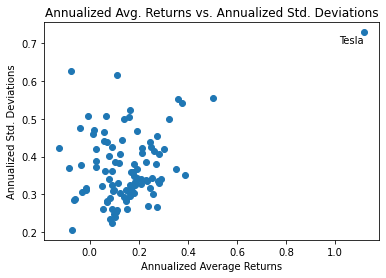

In [14]:
#This plots the annualized average returns against the standard deviation of these stocks. This helps us understand the relationship between risk and return for the 100 stocks in the S&P 100. 
plt.scatter(returns.mean().mul(252),returns.std().mul(np.sqrt(252)))
plt.xlabel('Annualized Average Returns')
plt.ylabel('Annualized Std. Deviations')
plt.title('Annualized Avg. Returns vs. Annualized Std. Deviations')
plt.annotate('Tesla', (stocks.loc[:, ('Returns', 'TSLA')].mean()*252 - 0.1, stocks.loc[:, ('Returns', 'TSLA')].std()*np.sqrt(252) - 0.03))
plt.show()

**5.) Written Response:** Based on the graph above, we can see that there is in fact an **outlier here which is Tesla at (1.1159, 0.7285)**, meaning Tesla had a much higher annualized average return for the year (~112%) than its index peers but this involved taking on significantly higher risk with an annualized std. deviation > 70%. What makes it an outlier is the significantly higher volatility and returns versus the basket of stocks in our analysis. In other words, its value compared to the neighboring values is at the extreme end of a dataset. 

Historically, Tesla has always been a famously volatile stock due to it being a high-growth company with a high level of risk. Until the last few years, Tesla experienced negative cash flows and also failed to report profitability on fiscal year-end statements. Another aspect of Tesla's high volatility was demonstrated during COVID-19 (from Jan-May 2020), as Tesla stock price fell more than the rest of the S&P100 due to supply chain issues and factory shutdowns in China. However, when the stock market recovered from COVID-19 (June 2020 and onward), Tesla's extremely high volatility now contributed to abnormally high growth and high returns compared to the S&P100. While higher risk generally implies higher returns by fundamental investment principles, Tesla's exceptional growth can also be attributed to its immense potential, high investor confidence, and continued defiance of analyst projections. This explains why Tesla is an outlier: it has higher returns, but it came with higher volatility than all of the rest of the S&P100. Without the outlier, this graph shows us how consistent the returns are over time. 

# 6. Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.

0.4410752247121408


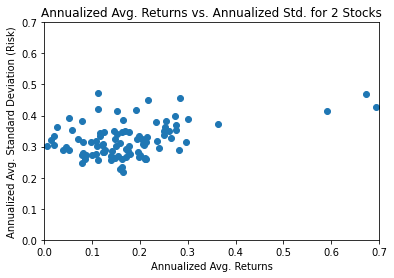

0.06485002683261339


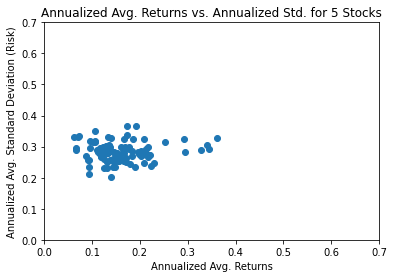

0.17054502203788122


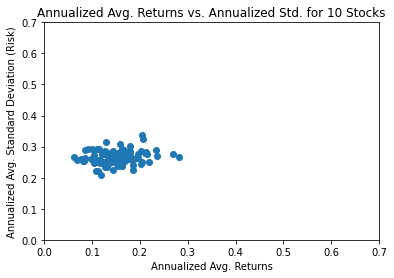

0.3524389654903729


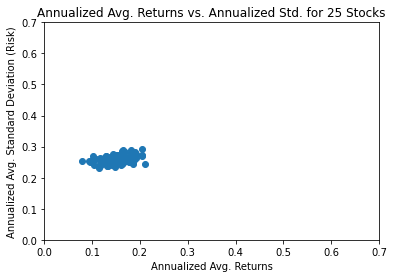

In [22]:
for i in [2, 5, 10, 25]:
    plt.clf()
    randreturns = []
    randstd = []
    
    for x in range(100):
        portfolio = stocks['Returns'].sample(n = i, axis = 1).mean(axis = 1)
        randreturns.append(portfolio.mean()*252)
        randstd.append(portfolio.std()*np.sqrt(252))
    
    print(np.corrcoef(randreturns, randstd)[0,1])
    plt.scatter(randreturns, randstd)
    plt.xlim([0,0.7])
    plt.ylim([0,0.7])
    plt.xlabel('Annualized Avg. Returns')
    plt.ylabel('Annualized Avg. Standard Deviation (Risk)')
    plt.title('Annualized Avg. Returns vs. Annualized Std. for ' + str(i) + ' Stocks')
    plt.show()

The charts above illustrate the concept of diversification. We generated 100 random portfolios holding 2, 5, 10, and 25 stocks to better understand how risk and return are influenced by the change in n (the number of stocks in a portfolio). As we increased the amount of stocks held in the portfolio, the average annualized returns maintained a similar range with most returns concentrating at ~15% annualized across all portfolios (which is close to the 14.98% return if we held all 101 stocks), but the annualized standard deviation significantly decreased as we added more stocks in the portfolio. The portfolios of 2 stocks had an average standard deviation ranging from 20 to 50%, whereas the portfolio of 25 stocks maintained a range of 20 to 30%. As we hold more stocks in our portfolios, we would expect the standard deviations of more random portfolios to be closer to 25.52%, which is the standard deviation if we fully diversified and held all 101 stocks. Therefore, these plots demonstrate the importance of diversification in order to lower exposure to risk. 
